In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/data_preprocessed.csv")

# Корреляция числовых признаков

In [3]:
numeric_columns = pd.Index(
    ['age', 'child_amt', 'confirmed_income', 'predicted_income', 'state_talk_time_sec', 'emp_age',
     'emp_age_new', 'emp_children_cnt', 'emp_work_months_cnt'], dtype=object)

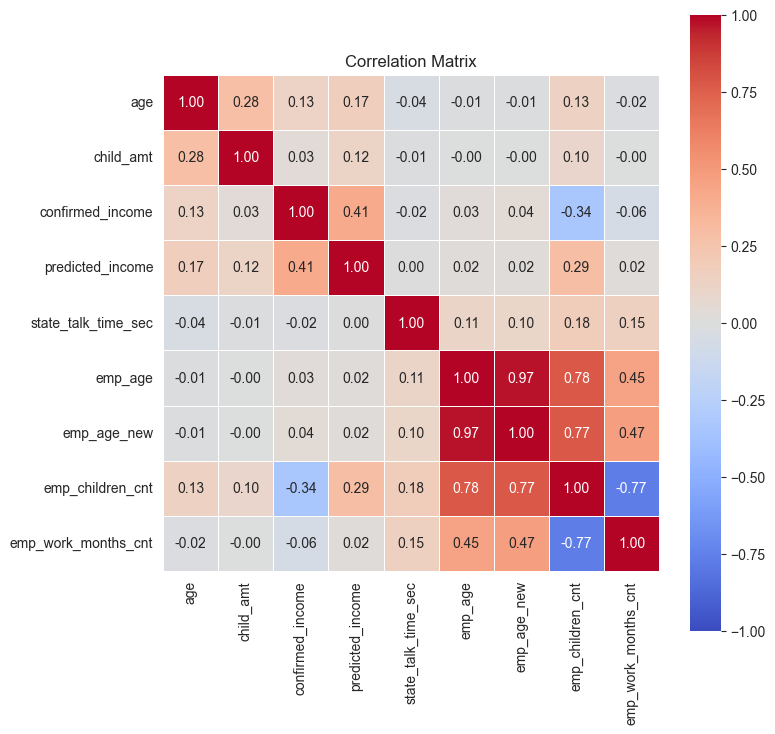

In [4]:
correlation_matrix = data[numeric_columns].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

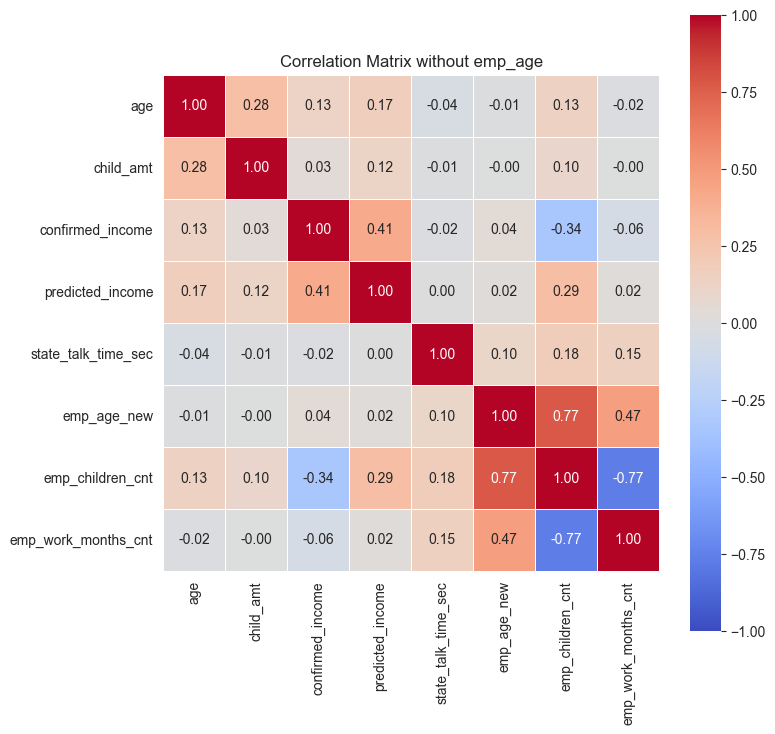

In [5]:
correlation_matrix = data[numeric_columns.drop(['emp_age'])].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix without emp_age')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

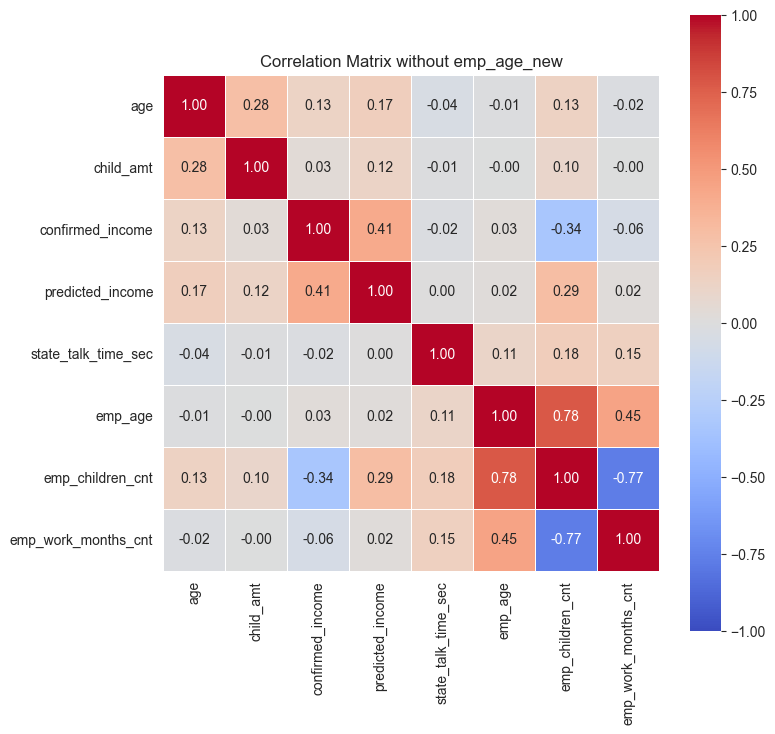

In [6]:
correlation_matrix = data[numeric_columns.drop(['emp_age_new'])].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix without emp_age_new')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

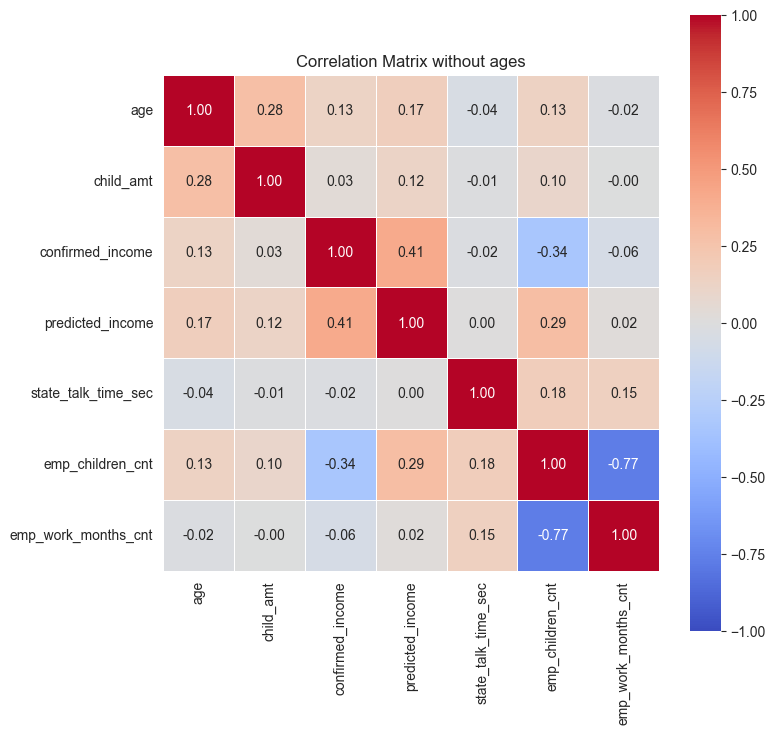

In [7]:
correlation_matrix = data[numeric_columns.drop(['emp_age', 'emp_age_new'])].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix without ages')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

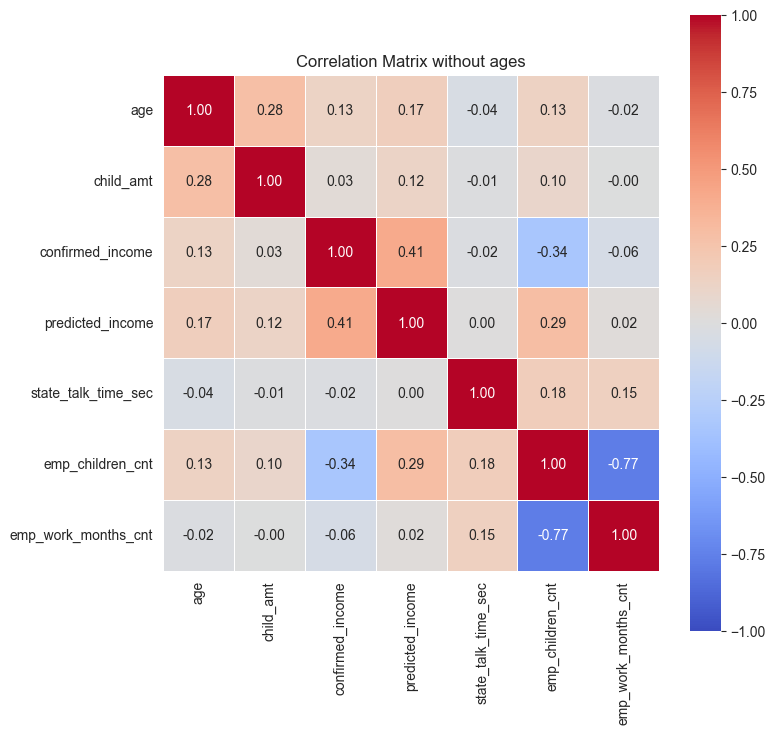

In [8]:
plt.show()
correlation_matrix = data[numeric_columns.drop(['emp_age', 'emp_age_new'])].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix without ages')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

#### Выводы

* Значение корреляции не меняются за счёт удаления столбцов с большим количеством пропусков. Чтобы убрать некоторые столбцы надо изменить numeric_columns.
* Я бы не рассматривал столбец emp_children_cnt и, так как он вызывает аномальные зависимости из-за большого количества пропусков
*   Имеется небольшая положительная линейная зависимость между продолжительностью разговора и количеством месяцев работы сотрудника (можно предположить, чем дольше работает сотрудник, тем дольше он может удержать клиента, значит с большим шансом завершит звонок успешно)
*   Количество лет клиента, количество детей клиента и доход имеют между собой малую положительную линейную зависимость (очевидно)
*   Предсказанный доход и подтвержденный доход имеют положительную корреляцию (что ничего не говорит)


### Версия для презы

In [9]:
columns = pd.Index(['age', 'child_amt', 'confirmed_income', 'state_talk_time_sec',
                    'emp_age_new', 'emp_work_months_cnt'], dtype=object)

Берём только количественные признаки, но убираем столбцы predicted_income, так как столбец confirmed_income даст больше полезной информации, и emp_work_months_cnt, так как 99% пропусков.

C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_26780\1737164386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(


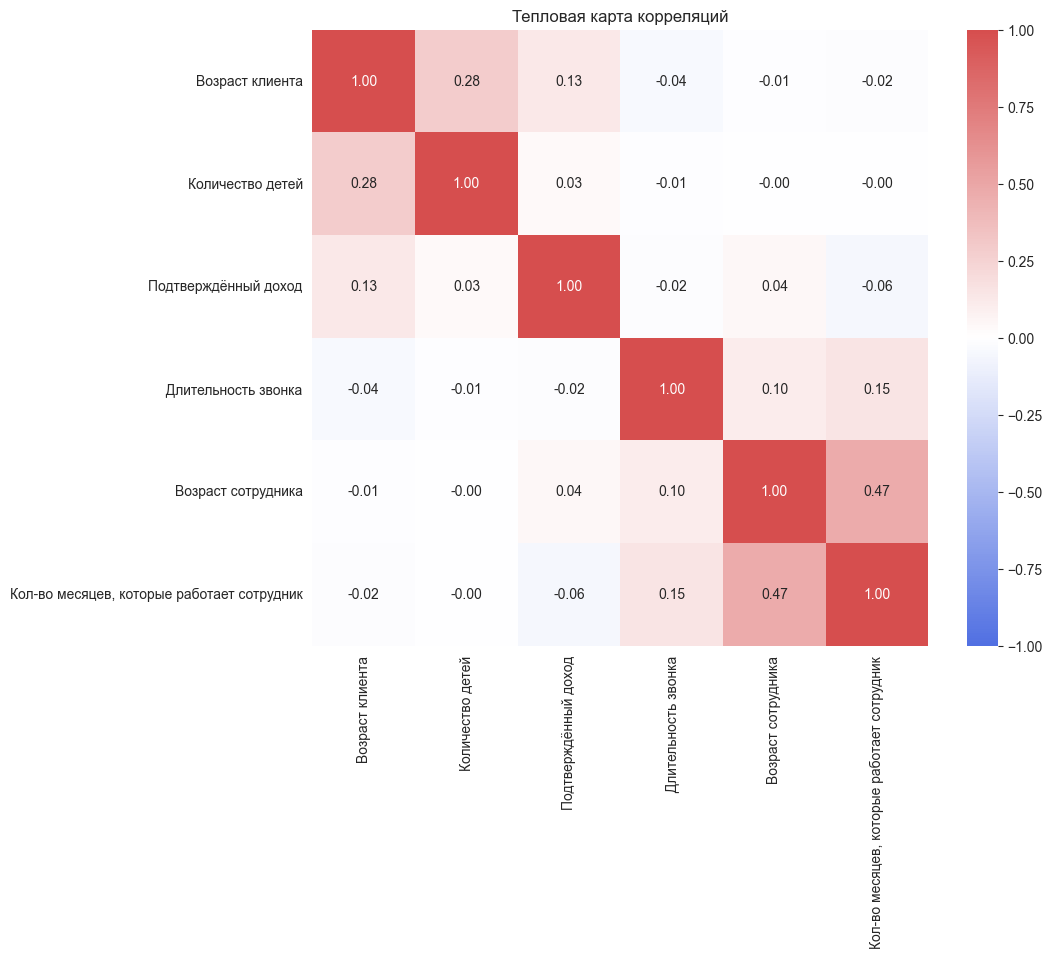

In [10]:
import matplotlib.colors as mcolors

colors = ["#5170E2", "#FFFFFF", "#D64E4E"]

cmap_name = "custom_cmap"
cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

df1 = data[columns]
df1.rename(
    columns={'age': 'Возраст клиента', 'child_amt': 'Количество детей', 'confirmed_income': 'Подтверждённый доход',
             'state_talk_time_sec': ' Длительность звонка',
             'emp_age_new': 'Возраст сотрудника', 'emp_work_months_cnt': 'Кол-во месяцев, которые работает сотрудник'},
    inplace=True)
correlation_matrix = df1.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title("Тепловая карта корреляций")
plt.show()

#### Выводы

*   Имеется небольшая положительная линейная зависимость между продолжительностью разговора и количеством месяцев работы сотрудника (можно предположить, чем дольше работает сотрудник, тем дольше он может удержать клиента, значит с большим шансом завершит звонок успешно)
*   Количество лет клиента, количество детей клиента и подтверждённый доходом имеют между собой малую положительную линейную зависимость (очевидно)


# Eta

In [11]:
categorical_columns = pd.Index(['gender_cd', 'region_size', 'foreign_flg',
                                'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg',
                                'realty_type', 'segment_cd', 'bundle_nm', 'product_cd', 'functional_cd',
                                'wo_hit_status_result_desc',
                                'wo_hit_status_reason_desc', 'emp_gender_cd',
                                'emp_citizenship_country_cd', 'emp_marital_status_cd'], dtype=object)

In [12]:
num_cat_correlation_matrix = pd.DataFrame(index=categorical_columns, columns=numeric_columns, dtype=np.float64)

In [13]:
for num_col in numeric_columns:
    for cat_col in categorical_columns:
        groups = [data[num_col][data[cat_col] == value] for value in data[cat_col].unique()]

        total_variance = np.var(data[num_col], ddof=1)
        group_means = [g.mean() for g in groups]
        group_sizes = [len(g) for g in groups]
        group_variance = sum(
            size * (mean - data[num_col].mean()) ** 2 for size, mean in zip(group_sizes, group_means)) / len(data)

        eta_squared = group_variance / total_variance
        num_cat_correlation_matrix.loc[cat_col, num_col] = eta_squared

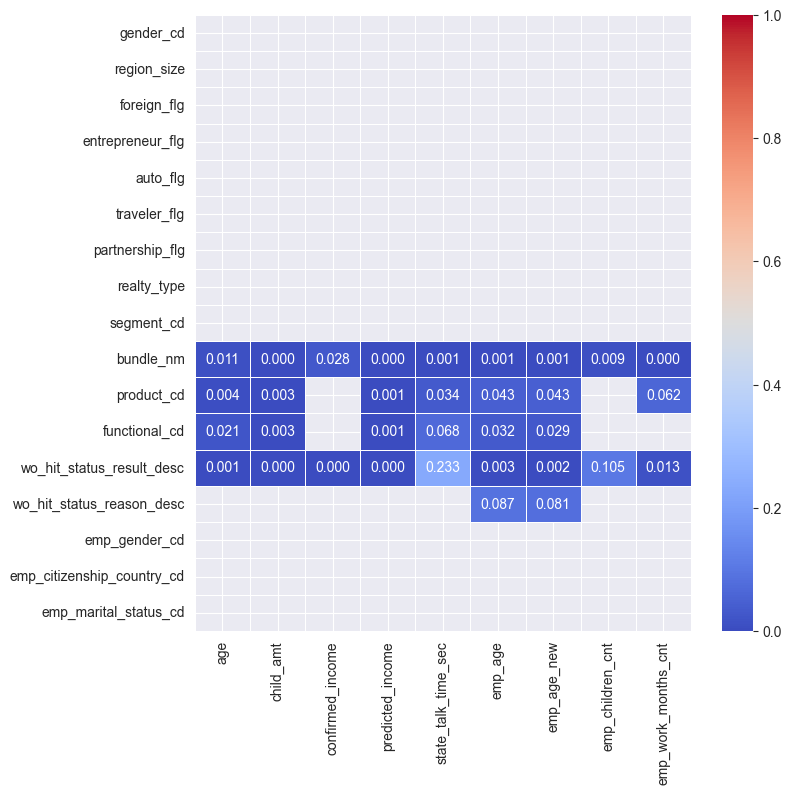

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(num_cat_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, fmt='.3f')
plt.show()

#### Вывод


* Продолжительность звонка имеет зависимость с результатом звонка (более продолжительные звонки в средней успешнее, очев)

Вобщем говно какое-то, ничего не получилось. Можно принципе вставить в презу убрав нулевые значения.